In [1]:
"""
Author: JiaHui (Jeffrey) Lu
ID: 25944800
"""

import numpy as np
import matplotlib.pyplot as plt

In [2]:
"""
Question1: define Rung Kutta 2 method.
This method takes in the derivative function f, the b value, the step size h and the 
initial position (x_0, y_0).
Returns the one step approximation from x_0 to x_0 + h using Runge Kutta
"""


def rungeKutta2(f, b, h, x_0, y_0):
    a = 1 - b
    alpha = 0.5 / b
    beta = 0.5 / b
    k1 = f(x_0, y_0)
    k2 = f(x_0 + alpha * h, y_0 + k1 * beta * h)
    return y_0 + (a * k1 + b * k2) * h

In [3]:
"""
Question2: define the euler method.
This method takes in the derivative function f, the step size h, and the initial
position (x_0, y_0). 
Returns the one step euler approximation from x_0 to x_0 + h
"""


def euler(f, h, x_0, y_0):
    return y_0 + h * f(x_0, y_0)

In [38]:
"""
Question 3, defining the functions
"""


def func1(x, y):
    return x * np.sqrt(1 - y ** 2)

def func1_original(x):
    return np.sin((x**2)/2)+4

def func2(x, y):
    return y ** 3

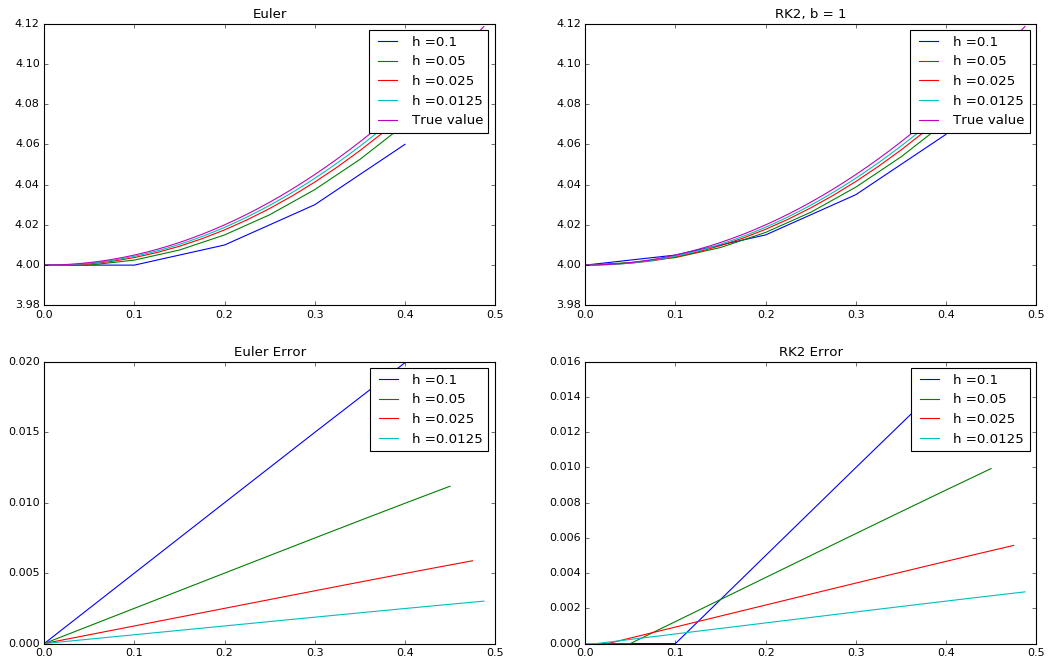

In [61]:
"""
question 4: plotting the solutions

function1:
"""

h_vals = [0.1, 0.05, 0.025, 0.0125]
fig=plt.figure(figsize=(16, 10), dpi= 80, facecolor='w', edgecolor='k')
for k in range(len(h_vals)):
    x_vals = np.arange(0, 0.5, h_vals[k])
    y_vals = [0]
    y_vals_RK = [0]
    y_vals_real = func1_original(x_vals)
    
    for i in range(len(x_vals)-1):
        y_vals.append(euler(func1, h_vals[k], x_vals[i], y_vals[i]))
        y_vals_RK.append(rungeKutta2(func1, 1, h_vals[k], x_vals[i], y_vals[i]))
    
    plt.subplot(2,2,1)
    plt.plot(x_vals, np.array(y_vals)+4, label="h ="+str(h_vals[k]))
    
    plt.subplot(2,2,2)
    plt.plot(x_vals, np.array(y_vals_RK)+4, label="h ="+str(h_vals[k]))
    
    plt.subplot(2,2,3)
    plt.plot(x_vals, np.abs(np.array(y_vals_real) - np.array(y_vals)-4), label="h ="+str(h_vals[k]))
    
    plt.subplot(2,2,4)
    plt.plot(x_vals, np.abs(np.array(y_vals_real) - np.array(y_vals_RK)-4), label="h ="+str(h_vals[k]))
    
    
plt.subplot(2,2,1)
plt.plot(x_vals, y_vals_real, label="True value")
plt.title('Euler')
plt.legend()

plt.subplot(2,2,2)
plt.plot(x_vals, y_vals_real, label="True value")
plt.title('RK2, b = 1')
plt.legend()

plt.subplot(2,2,3)
plt.legend()
plt.title("Euler Error")

plt.subplot(2,2,4)
plt.legend()
plt.title("RK2 Error")

plt.show()

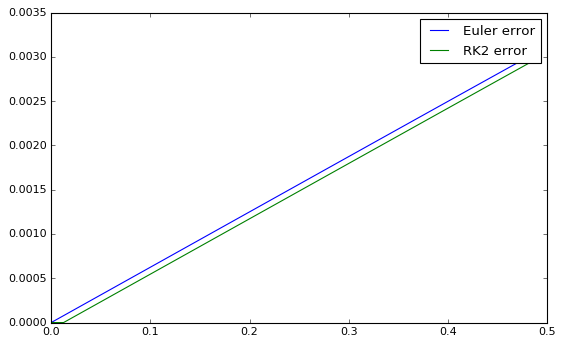

In [58]:
"""
Side by side error comparision when h = 0.0125
RK2 appears to be slightly better than Euler
"""
fig=plt.figure(figsize=(8, 5), dpi=80, facecolor='w', edgecolor='k')
plt.plot(x_vals, np.abs(np.array(y_vals_real) - np.array(y_vals_RK)-4), label="Euler error")
plt.plot(x_vals, np.abs(np.array(y_vals_real) - np.array(y_vals)-4), label="RK2 error")
plt.legend()
plt.show()

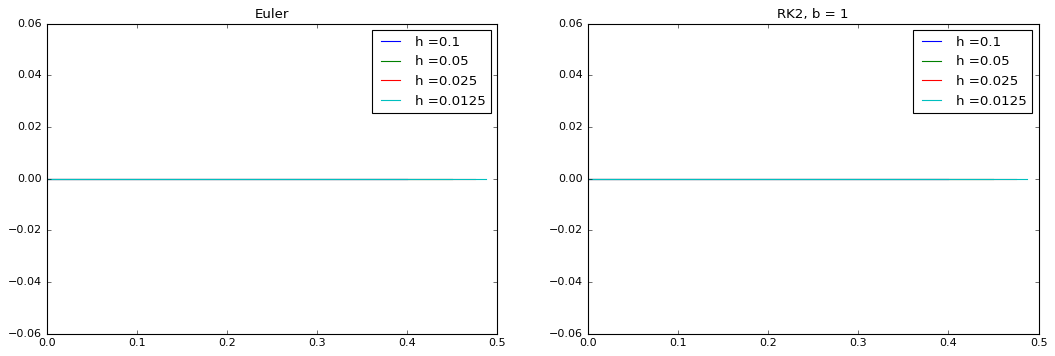

In [66]:
"""
second function
"""


h_vals = [0.1, 0.05, 0.025, 0.0125]
fig=plt.figure(figsize=(16, 5), dpi= 80, facecolor='w', edgecolor='k')
for k in range(len(h_vals)):
    x_vals = np.arange(0, 0.5, h_vals[k])
    y_vals = [0]
    y_vals_RK = [0]
    
    for i in range(len(x_vals)-1):
        y_vals.append(euler(func2, h_vals[k], x_vals[i], y_vals[i]))
        y_vals_RK.append(rungeKutta2(func2, 1, h_vals[k], x_vals[i], y_vals[i]))
    
    plt.subplot(1,2,1)
    plt.plot(x_vals, np.array(y_vals), label="h ="+str(h_vals[k]))
    
    plt.subplot(1,2,2)
    plt.plot(x_vals, np.array(y_vals_RK), label="h ="+str(h_vals[k]))
    
    
    
plt.subplot(1,2,1)
plt.title('Euler')
plt.legend()

plt.subplot(1,2,2)
plt.title('RK2, b = 1')
plt.legend()

plt.show()